In [1]:
%reset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
## Read data from personal desktop
homepath = r"C:\\Users\\vpmodak\\Desktop\\Personal\\Springboard\\NFL Play Predictor\\Data"
os.chdir(homepath)
df_final = pd.read_csv('FINAL_PBP_DATA.CSV')

# Restrict only plays in Q1-4 and Downs 1-4, since Qtr = 'NA' are two point plays, and Qtr5/6 are overtime plays
df_final = df_final[(df_final['qtr'].isin([1,2,3,4])) & (df_final['down'].isin([1,2,3,4]))]

print('Full data read successfully')
print(df_final.columns)

Full data read successfully
Index(['game_id', 'posteam', 'defteam', 'qtr', 'desc', 'down', 'ydstogo',
       'posteam_timeouts_remaining', 'score_differential', 'play_clock',
       'yards_to_goal', 'cum_pass_comp%', 'cum_pass_yards', 'cum_run_yards',
       'teamQB_dual_threat_rating', 'play_type'],
      dtype='object')


In [3]:
"""
g = sns.FacetGrid(df_final, row="qtr", col="down", hue = "play_type", hue_order = ['pass','run'], 
                  sharey=False)
g = (g.map(sns.distplot, "ydstogo", kde=False).set(xticks=list(np.arange(2,42,8))).add_legend(fontsize=12))
g.set_titles(size=12)
for ax in g.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12) 
g.fig.suptitle("Distribution of pass/run vs Yards to go", size=16)
g.fig.subplots_adjust(top=.92) 
"""

'\ng = sns.FacetGrid(df_final, row="qtr", col="down", hue = "play_type", hue_order = [\'pass\',\'run\'], \n                  sharey=False)\ng = (g.map(sns.distplot, "ydstogo", kde=False).set(xticks=list(np.arange(2,42,8))).add_legend(fontsize=12))\ng.set_titles(size=12)\nfor ax in g.axes.flat:\n    ax.yaxis.set_tick_params(labelsize=12)\n    ax.xaxis.set_tick_params(labelsize=12)\n    ax.set_title(ax.get_title(), fontsize=12)\n    ax.set_xlabel(ax.get_xlabel(), fontsize=12) \ng.fig.suptitle("Distribution of pass/run vs Yards to go", size=16)\ng.fig.subplots_adjust(top=.92) \n'

In [4]:
"""
from scipy.stats import ttest_ind
ydstogo_stats = pd.DataFrame(columns=['qtr', 'down', 'pass_mean', 'run_mean', 't-test_pvalue'])
for i in df_final['qtr'].unique():
    for j in df_final['down'].unique():
        raw_grouped = df_final[(df_final['qtr']==i) & (df_final['down']==j)].groupby('play_type')['ydstogo']
        result = ttest_ind(raw_grouped.get_group('pass'), raw_grouped.get_group('run'), equal_var=False)
#        print(i, j, result.pvalue)
        ydstogo_stats = ydstogo_stats.append({'qtr': i,
                                              'down': j, 
                                              'pass_mean': raw_grouped.mean()['pass'],
                                              'run_mean': raw_grouped.mean()['run'],
                                              't-test_pvalue': result.pvalue}, ignore_index=True)
ydstogo_stats
"""

"\nfrom scipy.stats import ttest_ind\nydstogo_stats = pd.DataFrame(columns=['qtr', 'down', 'pass_mean', 'run_mean', 't-test_pvalue'])\nfor i in df_final['qtr'].unique():\n    for j in df_final['down'].unique():\n        raw_grouped = df_final[(df_final['qtr']==i) & (df_final['down']==j)].groupby('play_type')['ydstogo']\n        result = ttest_ind(raw_grouped.get_group('pass'), raw_grouped.get_group('run'), equal_var=False)\n#        print(i, j, result.pvalue)\n        ydstogo_stats = ydstogo_stats.append({'qtr': i,\n                                              'down': j, \n                                              'pass_mean': raw_grouped.mean()['pass'],\n                                              'run_mean': raw_grouped.mean()['run'],\n                                              't-test_pvalue': result.pvalue}, ignore_index=True)\nydstogo_stats\n"

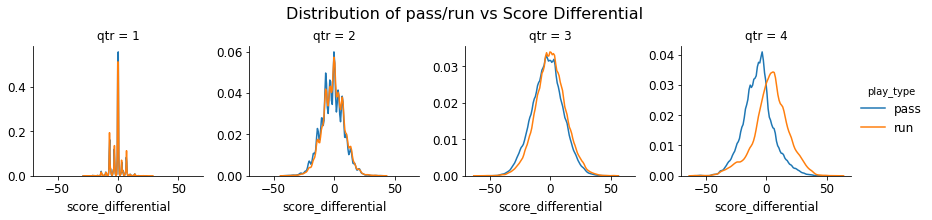

In [5]:
g = sns.FacetGrid(df_final, col="qtr", hue = "play_type", hue_order = ['pass','run'], 
                  sharey=False)
g = (g.map(sns.distplot, "score_differential", kde=True, hist=False).add_legend(fontsize=12))
for ax in g.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
g.fig.suptitle("Distribution of pass/run vs Score Differential", size=16)
g.fig.subplots_adjust(top=.8)  

In [6]:
from scipy.stats import ttest_ind
scorediff_stats = pd.DataFrame(columns=['qtr', 'pass_mean', 'run_mean', 't-test_pvalue'])
for i in df_final['qtr'].unique():
    raw_grouped = df_final[(df_final['qtr']==i)].groupby('play_type')['score_differential']
    result = ttest_ind(raw_grouped.get_group('pass'), raw_grouped.get_group('run'), equal_var=False)
    scorediff_stats = scorediff_stats.append({'qtr': i,
                                              'pass_mean': raw_grouped.mean()['pass'],
                                              'run_mean': raw_grouped.mean()['run'],
                                              't-test_pvalue': result.pvalue}, ignore_index=True)
scorediff_stats

C:\Users\vpmodak\Desktop\Work\Anaconda_Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\vpmodak\Desktop\Work\Anaconda_Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\vpmodak\Desktop\Work\Anaconda_Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,qtr,pass_mean,run_mean,t-test_pvalue
0,1.0,-0.928883,-0.828298,NaN
1,2.0,-1.566904,-0.583737,2.981838e-55
2,3.0,-2.273870,0.378420,7.405619e-189
3,4.0,-6.564699,3.633725,0.000000e+00


In [7]:
from scipy.stats import ttest_ind
ydstogoal_stats = pd.DataFrame(columns=['qtr', 'down', 'pass_mean', 'run_mean', 't-test_pvalue'])
for i in df_final['qtr'].unique():
    for j in df_final['down'].unique():
        raw_grouped = df_final[(df_final['qtr']==i) & (df_final['down']==j)].groupby('play_type')['yards_to_goal']
        result = ttest_ind(raw_grouped.get_group('pass'), raw_grouped.get_group('run'), equal_var=False)
#        print(i, j, result.pvalue)
        ydstogoal_stats = ydstogoal_stats.append({'qtr': i,
                                              'down': j, 
                                              'pass_mean': raw_grouped.mean()['pass'],
                                              'run_mean': raw_grouped.mean()['run'],
                                              't-test_pvalue': result.pvalue}, ignore_index=True)
ydstogoal_stats

,qtr,down,pass_mean,run_mean,t-test_pvalue
0,1.0,1.0,56.943765,54.944444,7.485971e-15
1,1.0,2.0,54.094562,53.726507,2.173131e-01
2,1.0,3.0,54.038005,49.715423,4.624214e-18
3,1.0,4.0,30.817204,32.150289,4.232708e-01
4,2.0,1.0,53.177789,52.392075,1.814939e-03
5,2.0,2.0,50.815722,50.947350,6.601637e-01
6,2.0,3.0,50.331691,48.184861,7.833346e-06
7,2.0,4.0,33.334112,29.722222,6.766392e-03
8,3.0,1.0,56.537286,54.641475,1.484549e-13
9,3.0,2.0,54.357429,52.805191,3.038223e-07


In [8]:
from scipy.stats import ttest_ind
perf_stats = pd.DataFrame(columns=['diff_for_pass_play', 'diff_for_run_play', 't-test_statistic', 't-test_pvalue'])
df_final['pass_run_diff'] = df_final['cum_pass_yards'] - df_final['cum_run_yards']
diff_grouped = df_final.groupby('play_type')['pass_run_diff']
result = ttest_ind(diff_grouped.get_group('pass'), diff_grouped.get_group('run'), equal_var=False)
perf_stats = perf_stats.append({'diff_for_pass_play': diff_grouped.mean()['pass'],
                                'diff_for_run_play': diff_grouped.mean()['run'],
                                't-test_statistic': result.statistic,
                                't-test_pvalue': result.pvalue}, ignore_index=True)
perf_stats

,diff_for_pass_play,diff_for_run_play,t-test_statistic,t-test_pvalue
0,75.859833,52.317236,87.260388,0.0


In [9]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
cum_perf_stats = pd.DataFrame(columns=['performance type', 'diff_mean', 't-test_pvalue'])
df_final['cum_perf_diff'] = df_final['cum_pass_yards']-df_final['cum_run_yards']

df_final[['cum_perf_diff','play_type']].to_csv('dummy.csv')

grouped_diff = df_final.groupby('play_type')['cum_perf_diff']

result_pass_diff = ttest_1samp(grouped_diff.get_group('pass'), 0)
result_run_diff = ttest_1samp(grouped_diff.get_group('run'), 0)

cum_perf_stats = cum_perf_stats.append({'performance type': 'pass',
                                      'diff_mean': grouped_diff.mean()['pass'],
                                      't-test_pvalue': result_pass_diff.pvalue}, ignore_index=True)

cum_perf_stats
#cum_perf_stats = cum_perf_stats.append({'performance type': 'run',
#                                      'run_mean': 1234,
#                                      't-test_pvalue': result_run_diff.pvalue}, ignore_index=True)

#cum_perf_stats
#result_pass = ttest_ind(raw_grouped_pass.get_group('pass'), raw_grouped_pass.get_group('run'), equal_var=False)

,performance type,diff_mean,t-test_pvalue
0,pass,75.859833,0.0


In [10]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
dual_threat_stats = pd.DataFrame(columns=['dual_threat_mean_run', 'dual_threat_mean_pass', 't-test_pvalue'])
grouped_dual_threat = df_final.groupby('play_type')['teamQB_dual_threat_rating']
result = ttest_ind(grouped_dual_threat.get_group('pass'), grouped_dual_threat.get_group('run'), equal_var=False)
dual_threat_stats = dual_threat_stats.append({'dual_threat_mean_run': grouped_dual_threat.mean()['run'],
                                              'dual_threat_mean_pass': grouped_dual_threat.mean()['pass'],
                                              't-test_pvalue': 1-result.pvalue/2}, ignore_index=True)
print(result)
print(grouped_dual_threat.mean())
dual_threat_stats

Ttest_indResult(statistic=-18.91246485026078, pvalue=1.0045562623962663e-79)
play_type
pass    0.520613
run     0.538057
Name: teamQB_dual_threat_rating, dtype: float64


,dual_threat_mean_run,dual_threat_mean_pass,t-test_pvalue
0,0.538057,0.520613,1.0
